**This will be a step-by-step construction of the particle deposition fraction density in humans following inhalation of spherical particles for a wide range of particle radii.**

In [0]:
#%reset
import numpy as np
import matplotlib.pyplot as plt
plt.rc('font', family='serif')
import pandas as pd

**Anatomy** \\
The anatomy is from data obtained by Weibel (1963).

Loading anatomy from file

In [0]:
rawlink = "https://raw.githubusercontent.com/ADSRichards/Inhalation_Pharmacokinetics/master/Data/Anatomy/lung_weibel.csv";
data_A = pd.read_csv(rawlink)
data_A.head(5)

Ng = len(data_A) # number of generations

Setting constants of anatomy

(0, 24)

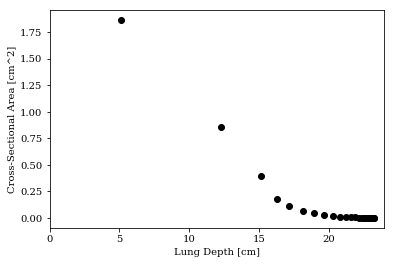

In [36]:
g_i = data_A.Generation # generation number
L_i = data_A.AvLength # average length of an airway [m]
D_i = data_A.AvDiameter # average diameter of an airway [m]
N_i = data_A.NumberOf # number of airways of a generation
ph_i = data_A.GravityAngle # angle between two airways at gen n+1 which have branched from gen n.
th_i = data_A.BranchingAngle

A_i = []
V_i = []
x_i = [L_i[0]/2]

for i in range(0,len(data_A)):
    A_i.append(np.pi*D_i[i]*D_i[i]/4)
    
    if i > 0:
        x_i.append(x_i[i-1] + (L_i[i-1] + L_i[i])/2)
    
plt.plot(x_i, A_i, "ok")
plt.xlabel('Lung Depth [cm]')
plt.ylabel('Cross-Sectional Area [cm^2]')

plt.xlim(0,24)


**Breathing Parameters** \\
The deposition fraction depends mainly on the speed of airflow entering the trachea.

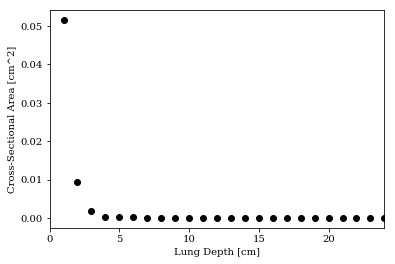

In [40]:
BF = 15 # Breathing frequency
VT = 1000 # Tidal volume

t_in = 0.5*BF
Q_in = VT/t_in/60

Q_i = []
u_i = []
V_i = []
t_i = []

for i in range(0,Ng):
    Q_i.append(Q_in/N_i[i])
    u_i.append(Q_i[i]/A_i[i]/100)
    V_i.append(A_i[i]/100*L_i[i]/100)
    t_i.append(V_i[i]/N_i[i]/Q_i[i]*60)
    
plt.plot(g_i, t_i, "ok");
plt.xlabel('Lung Depth [cm]');
plt.ylabel('Cross-Sectional Area [cm^2]');

plt.xlim(0,24);

Setting grid of possible particle diameters which may be inhaled

In [0]:
Nd = 400
dmin = 1.5e-9
dmax = 2.0e-4
d = np.logspace(np.log10(dmin),np.log10(dmax),Nd) # PARTICLE diameter grid [m]

Building parameters for deposition

In [0]:
# drug specific 
po = 1000

# thermodynamics
kB = 1.38e-23 # Boltzmann's constant [(kg m^2/s^2)/K]
kT = kB*(273.15 + 37.5) # Body temp in units of energy [kg m^2/s^2]
eta = 1.922e-5 # viscosity of air at body temp [kg s/m]
pa = 1.1372 # density of air at body temp [kg/m^3]
ell = 0.066e-6 # mean free path of air molecules at body temp [m]

# Cunningham slip correction factor (for diffusion and sedimentation)
Cd = []
for di in range(0,Nd):
    Cd.append( 1 + ell/d[di]*(2.514 + 0.8*np.exp(pow(-0.55,d[di]/ell))) )


# impaction specific
#stk = []
#for gi in range(0,Ng):
#  stki = []
#  for di in range(0,Nd):
#      stki.append(Cd[di]*(po*d[di]*d[di]*u_i[gi]/(9*eta*D_i[gi])))



# gravity specific
g = 9.81 # gravitational acceleration [m/s^2]

# diffusion specific